In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('DataFiles/SMOTE_data.csv')
df.head()

,DTP,Ala,Cys,Asp,Glu,Phe,Gly,His,Ile,Lys,...,Trans_Helices_10,Trans_Helices_11,Trans_Helices_12,Trans_Helices_13,Trans_Helices_14,Trans_Helices_15,Trans_Helices_16,Trans_Helices_17,Trans_Helices_19,DTP.1
0,0,0.201217,0.049898,0.135014,0.192164,0.606348,0.082153,0.072733,0.316374,0.157088,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0.377079,0.074389,0.150936,0.184124,0.210396,0.157443,0.081300,0.219536,0.214624,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0.179019,0.061000,0.206254,0.301967,0.258755,0.118346,0.183333,0.269995,0.192000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0.217427,0.077897,0.210709,0.281810,0.316313,0.109911,0.072033,0.306474,0.182304,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0.547961,0.061610,0.166653,0.203337,0.212984,0.195615,0.078567,0.121198,0.129280,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
# Count the number of 0s in the 'dtp' column
num_zeros = df[df['DTP'] == 0].shape[0]

# Count the number of 1s in the 'dtp' column
num_ones = df[df['DTP'] == 1].shape[0]

print(num_zeros)
print(num_ones)

5376
5376


In [4]:
df.columns

Index(['DTP', 'Ala', 'Cys', 'Asp', 'Glu', 'Phe', 'Gly', 'His', 'Ile', 'Lys',
       ...
       'Trans_Helices_10', 'Trans_Helices_11', 'Trans_Helices_12',
       'Trans_Helices_13', 'Trans_Helices_14', 'Trans_Helices_15',
       'Trans_Helices_16', 'Trans_Helices_17', 'Trans_Helices_19', 'DTP.1'],
      dtype='object', length=283)

In [5]:
df.shape

(10752, 283)

In [6]:
X = df.iloc[:, 1:]
y = df['DTP']


In [7]:
X.head()


,Ala,Cys,Asp,Glu,Phe,Gly,His,Ile,Lys,Leu,...,Trans_Helices_10,Trans_Helices_11,Trans_Helices_12,Trans_Helices_13,Trans_Helices_14,Trans_Helices_15,Trans_Helices_16,Trans_Helices_17,Trans_Helices_19,DTP.1
0,0.201217,0.049898,0.135014,0.192164,0.606348,0.082153,0.072733,0.316374,0.157088,0.291141,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.377079,0.074389,0.150936,0.184124,0.210396,0.157443,0.081300,0.219536,0.214624,0.240084,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.179019,0.061000,0.206254,0.301967,0.258755,0.118346,0.183333,0.269995,0.192000,0.223126,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.217427,0.077897,0.210709,0.281810,0.316313,0.109911,0.072033,0.306474,0.182304,0.242394,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.547961,0.061610,0.166653,0.203337,0.212984,0.195615,0.078567,0.121198,0.129280,0.327025,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
print(X.shape)

(10752, 282)


In [9]:
y.shape

(10752,)

In [10]:
# Create a numpy array from the pandas dataframe
X = X.values

In [11]:
from sklearn.decomposition import PCA


# Apply PCA transformation
pca = PCA(n_components=282)
X_transformed = pca.fit_transform(X)


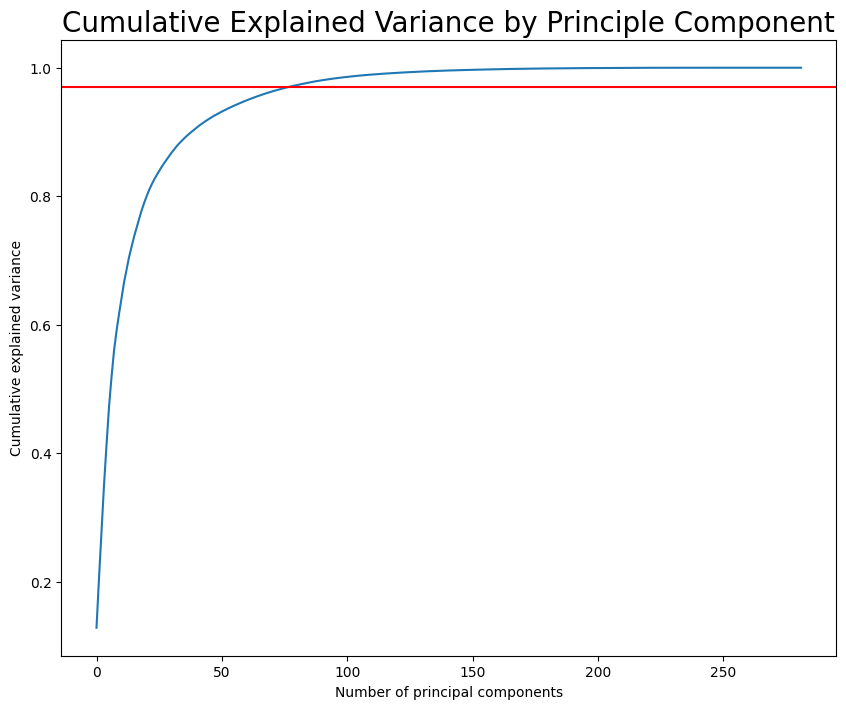

In [12]:
import matplotlib.pyplot as plt

# Determine explained variance for each principal component
explained_variance = pca.explained_variance_ratio_

# Determine cumulative explained variance
cumulative_explained_variance = np.cumsum(explained_variance)

# Plot
fig = plt.figure(figsize=(10, 8))
plt.plot(range(282), cumulative_explained_variance)
plt.xlabel('Number of principal components')
plt.ylabel('Cumulative explained variance')
plt.title("Cumulative Explained Variance by Principle Component", fontsize = 20)
plt.axhline(y=0.97, color='r', linestyle='-')



plt.show()

In [13]:
X = df.iloc[:, 1:]
y = df['DTP']


In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

# Create the random forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=0)

# Fit the classifier to the data
clf.fit(X, y)

# Get the feature importances
importances = clf.feature_importances_

# Sort the feature importances in descending order
indices = np.argsort(importances)[::-1]

# Create a list to store the feature importances
important_features = []

# Initialize a variable to store the cumulative feature importance
cumulative_importance = 0

# Loop over the feature importances
for i in indices:
    # Get the current feature importance
    importance = importances[i]
    # Add the current feature importance to the cumulative feature importance
    cumulative_importance += importance
    # Append the current feature to the list of important features
    important_features.append(X.columns[i])
    # If the cumulative feature importance is greater than or equal to 0.95, break the loop
    if cumulative_importance >= 0.97:
        break

# Print the list of important features
print("Important features:", important_features)
print(len(important_features))

Important features: ['Gly', 'Ser', 'Non-polar', 'Tyr', 'Polar', 'Gln', 'Phe', 'SignalP', 'Pro', 'Aromatic', 'Val', 'Asn', 'Ile', 'Met', 'Leu', 'Asp', 'Basic', 'Lys', 'Arg', 'Acidic', 'Ala', 'Aliphatic', 'Cys', 'Glu', 'Small', 'Trp', 'Tiny', 'Hydrophobicity', 'Charged', 'His', 'Thr', 'Thr.1_0', 'Ser.1_0', 'Trans_Helices_0', 'Ngly_0', 'Ogly_T_0', 'Ngly_2', 'Thr.1_2', 'Ogly_S_0', 'Thr.1_1', 'Tyr.1_0', 'LowComplexityRegions_2', 'LowComplexityRegions_0', 'LowComplexityRegions_1', 'Ser.1_1', 'Trans_Helices_1', 'Tyr.1_1', 'Ngly_1', 'LowComplexityRegions_3', 'LowComplexityRegions_4', 'Ogly_T_1', 'Ser.1_2', 'Ngly_3', 'Ogly_T_2', 'LowComplexityRegions_5', 'Tyr.1_2', 'Thr.1_3', 'Trans_Helices_2', 'Ngly_4', 'Ogly_S_1', 'Thr.1_4', 'Ogly_S_2', 'Ogly_T_3', 'Ngly_5', 'Ser.1_3', 'Thr.1_5', 'Trans_Helices_3', 'Ogly_T_4']
68


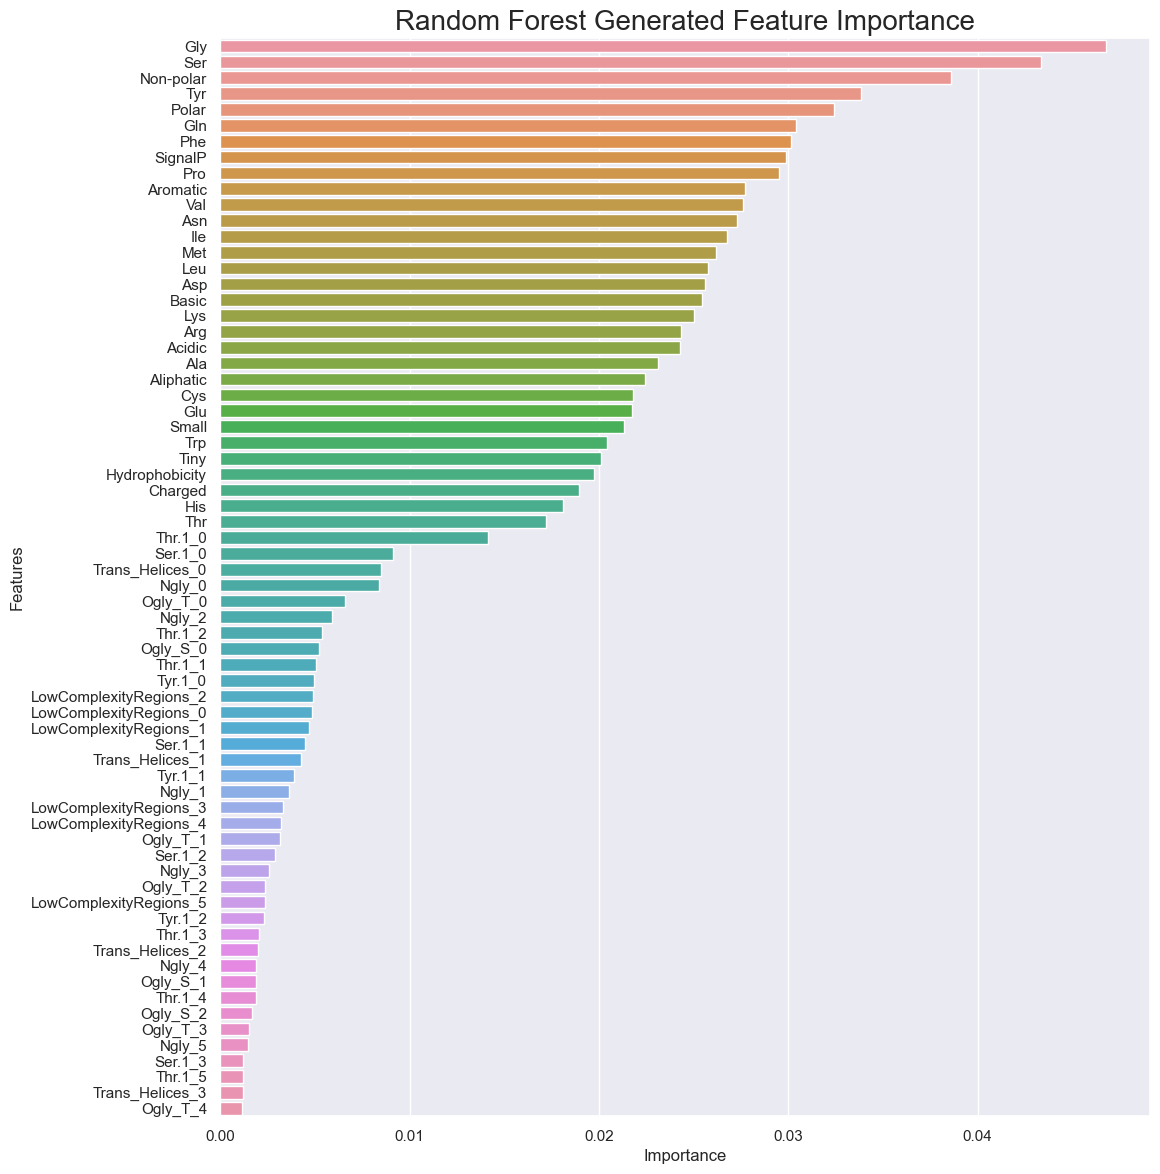

In [15]:
import seaborn as sns

# Increase the plot size
sns.set(rc={'figure.figsize':(12,14)})

# Create a bar plot of the feature importances
sns.barplot(x=importances[indices[:len(important_features)]], y=important_features)

# Add a title and x/y labels
plt.title('Random Forest Generated Feature Importance', fontsize=20)
plt.xlabel('Importance')
plt.ylabel('Features')

# Show the plot
plt.show()


In [16]:
# Create a new data frame with only the important features
df_important = pd.DataFrame(X, columns=important_features)

df_important.head()


,Gly,Ser,Non-polar,Tyr,Polar,Gln,Phe,SignalP,Pro,Aromatic,...,Ngly_4,Ogly_S_1,Thr.1_4,Ogly_S_2,Ogly_T_3,Ngly_5,Ser.1_3,Thr.1_5,Trans_Helices_3,Ogly_T_4
0,0.082153,0.241186,0.695763,0.164048,0.304237,0.020253,0.606348,0.000,0.118990,0.580361,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.157443,0.276723,0.603853,0.094857,0.396147,0.037053,0.210396,0.975,0.046040,0.307330,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.118346,0.226908,0.527128,0.093333,0.472872,0.040506,0.258755,0.001,0.088104,0.406003,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.109911,0.315472,0.560565,0.085555,0.439435,0.029843,0.316313,0.000,0.108795,0.313547,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.195615,0.176325,0.745964,0.031422,0.254036,0.034096,0.212984,0.713,0.152570,0.235706,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
df_important.shape

(10752, 68)

In [18]:
Y = y.to_frame()
Y.head(2)

,DTP
0,0
1,0


In [19]:
df_imp_lab = pd.concat([Y, df_important],axis=1)
df_imp_lab.head(1)

,DTP,Gly,Ser,Non-polar,Tyr,Polar,Gln,Phe,SignalP,Pro,...,Ngly_4,Ogly_S_1,Thr.1_4,Ogly_S_2,Ogly_T_3,Ngly_5,Ser.1_3,Thr.1_5,Trans_Helices_3,Ogly_T_4
0,0,0.082153,0.241186,0.695763,0.164048,0.304237,0.020253,0.606348,0.0,0.11899,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


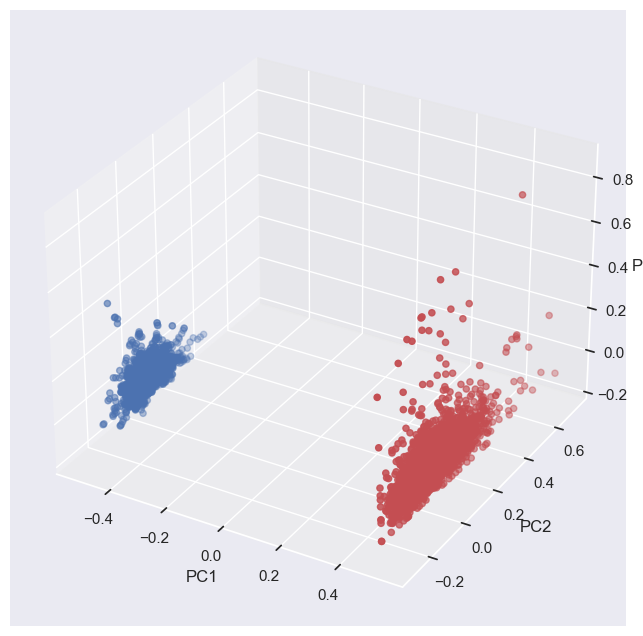

In [20]:
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# Select the first three features from your dataframe
X = df_imp_lab[df_imp_lab.columns[:3]]

# Initialize a PCA model with 3 components
pca = PCA(n_components=3)

# Fit and transform the data
X_transformed = pca.fit_transform(X)

# Create a custom color map
colors = np.where(df_imp_lab['DTP']==1, 'r', 'b')

# Plot the data in 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_transformed[:, 0], X_transformed[:, 1], X_transformed[:, 2], c=colors)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.show()




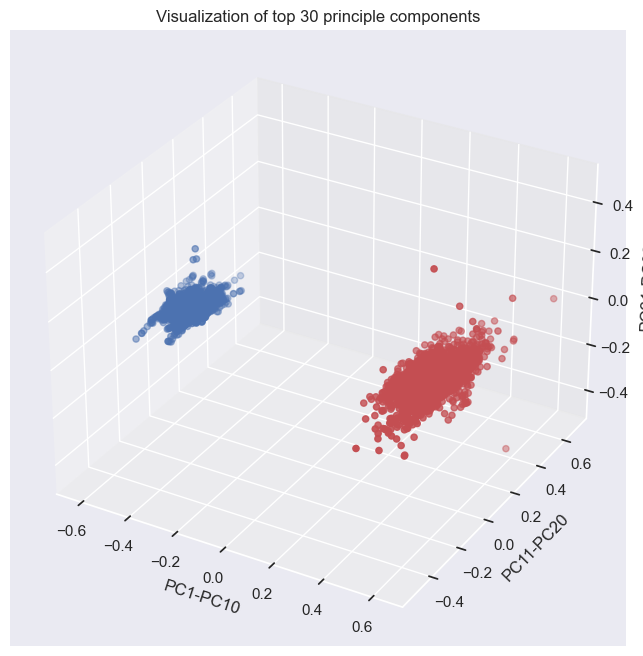

In [21]:
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# Select the first 30 features from your dataframe
X = df_imp_lab[df_imp_lab.columns[:30]]

# Initialize a PCA model with 30 components
pca = PCA(n_components=30)

# Fit and transform the data
X_transformed = pca.fit_transform(X)

# Group the top 10 principle components in the x, y, and z directions
x_pc = X_transformed[:, :10]
y_pc = X_transformed[:, 10:20]
z_pc = X_transformed[:, 20:30]

colors = np.where(df_imp_lab['DTP']==1, 'r', 'b')

# Plot the data in 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_pc[:, 0], y_pc[:, 0], z_pc[:, 0], c=colors)
ax.set_xlabel('PC1-PC10')
ax.set_ylabel('PC11-PC20')
ax.set_zlabel('PC21-PC30')
plt.title("Visualization of top 30 principle components")
plt.show()

In [22]:
# Create a dictionary to store the counts of 0s and 1s above and below the plane
counts = {'above': {0: 0, 1: 0}, 'below': {0: 0, 1: 0}}

# Iterate through the data points
for i in range(len(x_pc)):
    # Check if the x-value of the point is above or below the plane
    if x_pc[i, 0] > 0.4:
        counts['above'][df_imp_lab['DTP'][i]] += 1
    else:
        counts['below'][df_imp_lab['DTP'][i]] += 1

print(counts)

{'above': {0: 0, 1: 5268}, 'below': {0: 5376, 1: 108}}


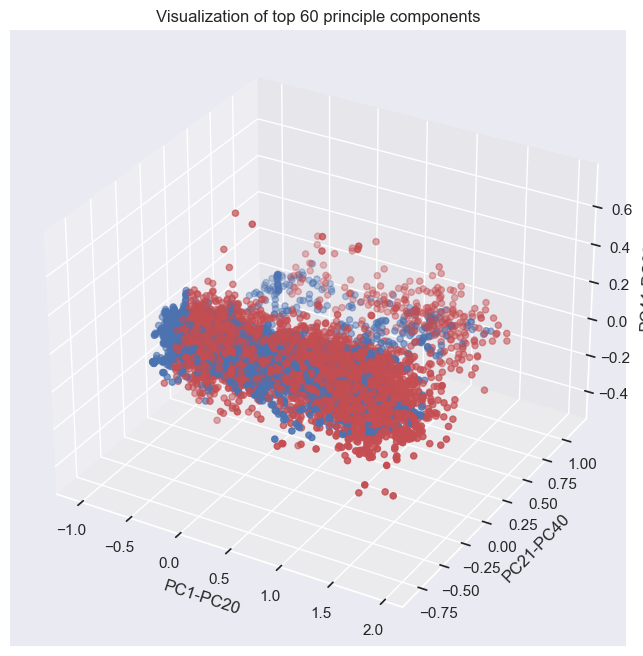

In [23]:
# Select the first 30 features from your dataframe
X = df_imp_lab[df_imp_lab.columns[:60]]

# Initialize a PCA model with 30 components
pca = PCA(n_components=60)

# Fit and transform the data
X_transformed = pca.fit_transform(X)

# Group the top 10 principle components in the x, y, and z directions
x_pc = X_transformed[:, :20]
y_pc = X_transformed[:, 20:40]
z_pc = X_transformed[:, 40:60]

colors = np.where(df_imp_lab['DTP']==1, 'r', 'b')

# Plot the data in 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_pc[:, 0], y_pc[:, 0], z_pc[:, 0], c=colors)
ax.set_xlabel('PC1-PC20')
ax.set_ylabel('PC21-PC40')
ax.set_zlabel('PC41-PC60')
plt.title("Visualization of top 60 principle components")
plt.show()

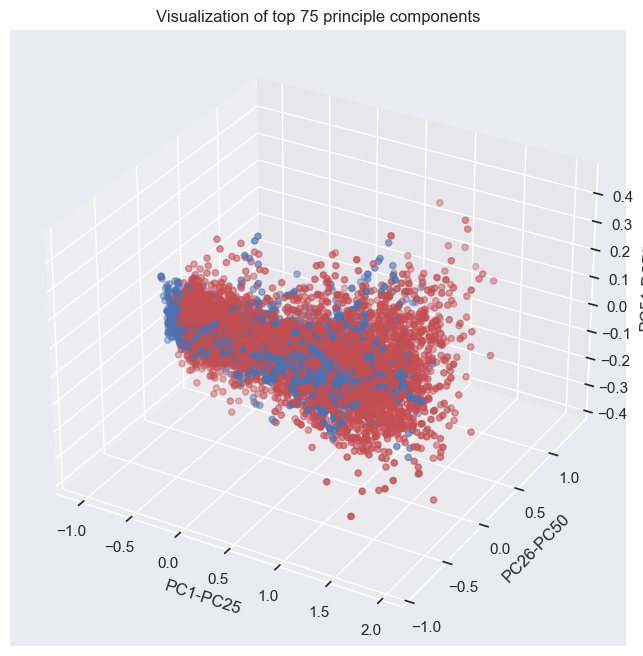

In [24]:
# Select the first 30 features from your dataframe
X = df_imp_lab[df_imp_lab.columns[:69]]

# Initialize a PCA model with 30 components
pca = PCA(n_components=69)

# Fit and transform the data
X_transformed = pca.fit_transform(X)

# Group the top 10 principle components in the x, y, and z directions
x_pc = X_transformed[:, :23]
y_pc = X_transformed[:, 23:46]
z_pc = X_transformed[:, 46:69]

colors = np.where(df_imp_lab['DTP']==1, 'r', 'b')

# Plot the data in 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_pc[:, 0], y_pc[:, 0], z_pc[:, 0], c=colors)
ax.set_xlabel('PC1-PC25')
ax.set_ylabel('PC26-PC50')
ax.set_zlabel('PC51-PC75')
plt.title("Visualization of top 75 principle components")
plt.show()

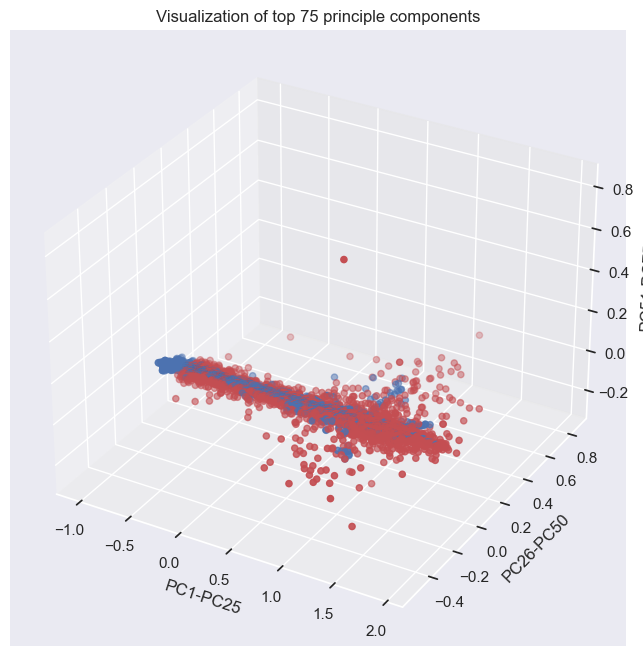

In [25]:
# Select the first 30 features from your dataframe
X = df[df.columns[:225]]

# Initialize a PCA model with 30 components
pca = PCA(n_components=225)

# Fit and transform the data
X_transformed = pca.fit_transform(X)

# Group the top 10 principle components in the x, y, and z directions
x_pc = X_transformed[:, :75]
y_pc = X_transformed[:, 75:150]
z_pc = X_transformed[:, 150:225]

colors = np.where(df['DTP']==1, 'r', 'b')

# Plot the data in 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_pc[:, 0], y_pc[:, 0], z_pc[:, 0], c=colors)
ax.set_xlabel('PC1-PC25')
ax.set_ylabel('PC26-PC50')
ax.set_zlabel('PC51-PC75')
plt.title("Visualization of top 75 principle components")
plt.show()

DTP - Red
NDTP - Blue

In [26]:
df.head()

,DTP,Ala,Cys,Asp,Glu,Phe,Gly,His,Ile,Lys,...,Trans_Helices_10,Trans_Helices_11,Trans_Helices_12,Trans_Helices_13,Trans_Helices_14,Trans_Helices_15,Trans_Helices_16,Trans_Helices_17,Trans_Helices_19,DTP.1
0,0,0.201217,0.049898,0.135014,0.192164,0.606348,0.082153,0.072733,0.316374,0.157088,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0.377079,0.074389,0.150936,0.184124,0.210396,0.157443,0.081300,0.219536,0.214624,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0.179019,0.061000,0.206254,0.301967,0.258755,0.118346,0.183333,0.269995,0.192000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0.217427,0.077897,0.210709,0.281810,0.316313,0.109911,0.072033,0.306474,0.182304,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0.547961,0.061610,0.166653,0.203337,0.212984,0.195615,0.078567,0.121198,0.129280,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


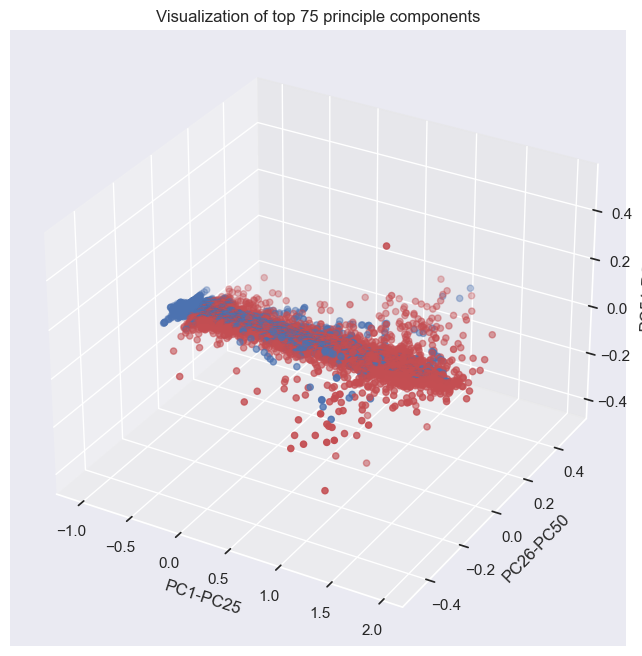

In [27]:
# Select the first 30 features from your dataframe
X = df[df.columns[:282]]

# Initialize a PCA model with 30 components
pca = PCA(n_components=282)

# Fit and transform the data
X_transformed = pca.fit_transform(X)

# Group the top 10 principle components in the x, y, and z directions
x_pc = X_transformed[:, :94]
y_pc = X_transformed[:, 94:188]
z_pc = X_transformed[:, 188:282]

colors = np.where(df['DTP']==1, 'r', 'b')

# Plot the data in 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_pc[:, 0], y_pc[:, 0], z_pc[:, 0], c=colors)
ax.set_xlabel('PC1-PC25')
ax.set_ylabel('PC26-PC50')
ax.set_zlabel('PC51-PC75')
plt.title("Visualization of top 75 principle components")
plt.show()

In [28]:
df_important.head(2)

,Gly,Ser,Non-polar,Tyr,Polar,Gln,Phe,SignalP,Pro,Aromatic,...,Ngly_4,Ogly_S_1,Thr.1_4,Ogly_S_2,Ogly_T_3,Ngly_5,Ser.1_3,Thr.1_5,Trans_Helices_3,Ogly_T_4
0,0.082153,0.241186,0.695763,0.164048,0.304237,0.020253,0.606348,0.000,0.11899,0.580361,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.157443,0.276723,0.603853,0.094857,0.396147,0.037053,0.210396,0.975,0.04604,0.307330,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [29]:
df.head()

,DTP,Ala,Cys,Asp,Glu,Phe,Gly,His,Ile,Lys,...,Trans_Helices_10,Trans_Helices_11,Trans_Helices_12,Trans_Helices_13,Trans_Helices_14,Trans_Helices_15,Trans_Helices_16,Trans_Helices_17,Trans_Helices_19,DTP.1
0,0,0.201217,0.049898,0.135014,0.192164,0.606348,0.082153,0.072733,0.316374,0.157088,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0.377079,0.074389,0.150936,0.184124,0.210396,0.157443,0.081300,0.219536,0.214624,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0.179019,0.061000,0.206254,0.301967,0.258755,0.118346,0.183333,0.269995,0.192000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0.217427,0.077897,0.210709,0.281810,0.316313,0.109911,0.072033,0.306474,0.182304,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0.547961,0.061610,0.166653,0.203337,0.212984,0.195615,0.078567,0.121198,0.129280,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
# Import necessary libraries
from sklearn.model_selection import train_test_split


# Split the data into features and target
X = df_important
y = df['DTP']

# Split the data into training and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=0)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.7, random_state=0)



In [31]:
print(y_train.shape)
print(y_test.shape)
print(y_val.shape)

(7526,)
(2259,)
(967,)


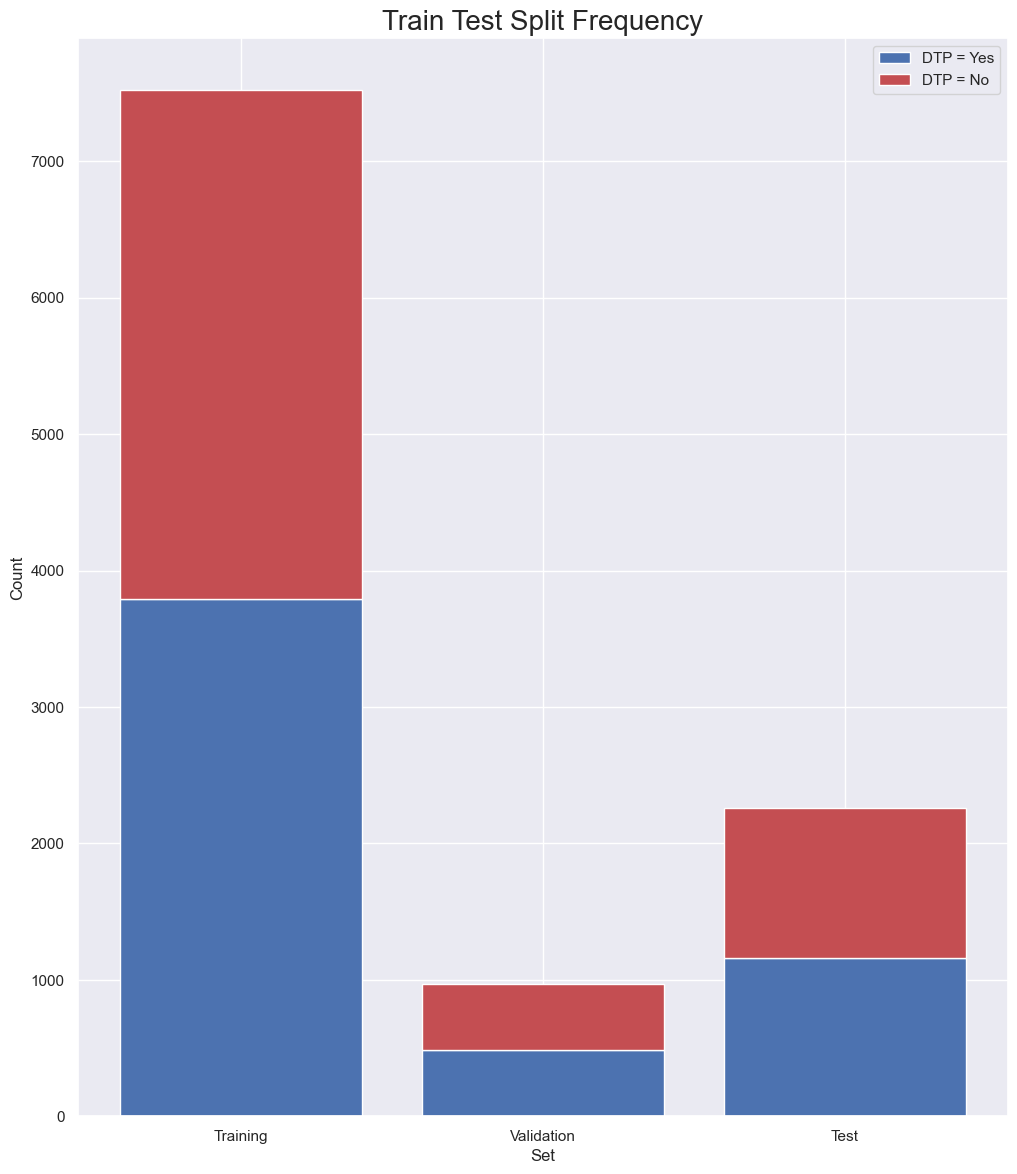

In [32]:
# Count the number of observations for each label in each set
train_counts = y_train.value_counts().tolist()
val_counts = y_val.value_counts().tolist()
test_counts = y_test.value_counts().tolist()

# Plot the counts
plt.title("Train Test Split Frequency", fontsize=20)
plt.bar(['Training', 'Validation', 'Test'], [train_counts[0], val_counts[0], test_counts[0]], color = 'b')
plt.bar(['Training', 'Validation', 'Test'], [train_counts[1], val_counts[1], test_counts[1]], bottom=[train_counts[0], val_counts[0], test_counts[0]], color = 'r')
plt.xlabel('Set')
plt.ylabel('Count')
plt.legend(['DTP = Yes', 'DTP = No'])
plt.show()

In [33]:
# Calculate the ratio of 0's in each set
train_ratio = (y_train == 0).sum() / len(y_train)
test_ratio = (y_test == 0).sum() / len(y_test)
val_ratio = (y_val == 0).sum() / len(y_val)

# Print the ratios
print(f'Ratio of 0\'s in train set: {train_ratio:.2%}')
print(f'Ratio of 0\'s in test set: {test_ratio:.2%}')
print(f'Ratio of 0\'s in validation set: {val_ratio:.2%}')


Ratio of 0's in train set: 49.61%
Ratio of 0's in test set: 51.48%
Ratio of 0's in validation set: 49.53%


In [34]:
df_imp_lab.head(1)

,DTP,Gly,Ser,Non-polar,Tyr,Polar,Gln,Phe,SignalP,Pro,...,Ngly_4,Ogly_S_1,Thr.1_4,Ogly_S_2,Ogly_T_3,Ngly_5,Ser.1_3,Thr.1_5,Trans_Helices_3,Ogly_T_4
0,0,0.082153,0.241186,0.695763,0.164048,0.304237,0.020253,0.606348,0.0,0.11899,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
from pathlib import Path 

filepath = Path('DataFiles/SmoteImpFeat97%.csv')  
# filepath.parent.mkdir(parents=True, exist_ok=True)  
df_imp_lab.to_csv(filepath, index=False)  

END of EDA

In [36]:
from sklearn.model_selection import train_test_split
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader

#Train Test Split
X_train, X_test, y_train, y_test = train_test_split(df_important, y, test_size=0.3, random_state=42)

# Convert the training set and test set to PyTorch tensors
X_train_tensor = torch.from_numpy(X_train.values).float()
X_test_tensor = torch.from_numpy(X_test.values).float()

# Convert the training set and test set to PyTorch datasets
train_dataset = TensorDataset(X_train_tensor, y_train)
test_dataset = TensorDataset(X_test_tensor, y_test)

# Create data loaders for the training set and test set
train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=32, shuffle=True)

TypeError: 'int' object is not callable

In [ ]:
# # Import the necessary PyTorch modules
# import torch.nn as nn
# import torch.optim as optim

# # Define the architecture of the auto-encoder
# class AutoEncoder(nn.Module):
#     def __init__(self, input_size, hidden_size1, hidden_size2):
#         super(AutoEncoder, self).__init__()
#         self.encoder = nn.Sequential(
#             nn.Linear(input_size, hidden_size1),
#             nn.ReLU(),
#             nn.Linear(hidden_size1, hidden_size2),
#             nn.ReLU()
#         )
#         self.decoder = nn.Sequential(
#             nn.Linear(hidden_size2, hidden_size1),
#             nn.ReLU(),
#             nn.Linear(hidden_size1, input_size),
#             nn.Sigmoid()
#         )

#     def forward(self, x):
#         x = self.encoder(x)
#         x = self.decoder(x)
#         return x

# # Create an instance of the auto-encoder
# input_size = 51
# hidden_size1 = 30
# hidden_size2 = 15
# auto_encoder = AutoEncoder(input_size, hidden_size1, hidden_size2)

# # Define the loss function and the optimizer
# criterion = nn.MSELoss()
# optimizer = optim.Adam(auto_encoder.parameters(), lr=0.01)




In [ ]:
# # Compute the reconstruction error using mean squared error
# mse = nn.MSELoss()
# reconstruction_error1 = mse(x_hat, x)

# # Compute the reconstruction error using mean absolute error
# mae = nn.L1Loss()
# reconstruction_error2 = mae(x_hat, x)


In [ ]:
# print(reconstruction_error1)
# print(reconstruction_error2)

In [ ]:
# # Train the auto-encoder
# num_epochs = 100
# for epoch in range(num_epochs):
#     for data in dataloader:
#         x, _ = data
#         # Forward pass
#         x_hat = auto_encoder(x)
#         loss = criterion(x_hat, x)

In [ ]:
# from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.3)

In [ ]:
# import torch
# import torch.nn as nn

# class StackedAutoEncoder(nn.Module):
#     def __init__(self, input_dim, hidden_dim, num_layers):
#         super(StackedAutoEncoder, self).__init__()
        
#         self.num_layers = num_layers
        
#         # Encoder layers
#         self.encoder_layers = nn.ModuleList()
#         for i in range(num_layers):
#             self.encoder_layers.append(nn.Linear(input_dim if i==0 else hidden_dim, hidden_dim))
#             self.encoder_layers.append(nn.ReLU())
        
#         # Decoder layers
#         self.decoder_layers = nn.ModuleList()
#         for i in range(num_layers):
#             self.decoder_layers.append(nn.Linear(hidden_dim if i==0 else hidden_dim, input_dim if i==num_layers-1 else hidden_dim))
#             self.decoder_layers.append(nn.ReLU())
            
#     def forward(self, x):
#         # Pass through encoder layers
#         for i in range(0, len(self.encoder_layers), 2):
#             x = self.encoder_layers[i](x)
#             x = self.encoder_layers[i+1](x)

#         # Pass through decoder layers
#         for i in range(0, len(self.decoder_layers), 2):
#             x = self.decoder_layers[i](x)
#             x = self.decoder_layers[i+1](x)
#         return x

# # Define the input dimension, hidden dimension, and number of layers
# input_dim = 51
# hidden_dim = 128
# num_layers = 2
# epochs = 50

# # Initialize the model
# model = StackedAutoEncoder(input_dim, hidden_dim, num_layers)



In [ ]:
import torch
import torch.nn as nn

class StackedAutoEncoder(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_layers):
        super(StackedAutoEncoder, self).__init__()
        
        self.num_layers = num_layers
        
        # Encoder layers
        self.encoder_layers = nn.ModuleList()
        for i in range(num_layers):
            self.encoder_layers.append(nn.Linear(input_dim if i==0 else hidden_dim, hidden_dim))
            self.encoder_layers.append(nn.ReLU())
        
        # Decoder layers
        self.decoder_layers = nn.ModuleList()
        for i in range(num_layers):
            self.decoder_layers.append(nn.Linear(hidden_dim if i==0 else input_dim, input_dim if i==num_layers-1 else hidden_dim))
            self.decoder_layers.append(nn.ReLU())
            
    def forward(self, x):
        # Pass through encoder layers
        for i in range(0, len(self.encoder_layers), 4):
            x = self.encoder_layers[i](x)
            x = self.encoder_layers[i+1](x)
            x = self.encoder_layers[i+2](x)
            x = self.encoder_layers[i+3](x)

        # Pass through decoder layers
        for i in range(0, len(self.decoder_layers), 4):
            x = self.decoder_layers[i](x)
            x = self.decoder_layers[i+1](x)
            x = self.decoder_layers[i+2](x)
            x = self.decoder_layers[i+3](x)
        return x



In [17]:
# train_stacked_autoencoder(model, train_dataloader=train_dataloader, test_dataloader=test_dataloader, num_epochs=50 )


In [18]:
import torch
import torch.nn as nn

# class StackedAutoEncoder2(nn.Module):
#     def __init__(self, input_dim, hidden_dim, num_layers):
#         super(StackedAutoEncoder2, self).__init__()
        
#         self.num_layers = num_layers
    
#         # Encoder layers
#         self.encoder_layers = nn.ModuleList()
#         for i in range(num_layers):
#             self.encoder_layers.append(nn.Linear(input_dim if i==0 else hidden_dim, hidden_dim))
#             self.encoder_layers.append(nn.ReLU())
#             self.encoder_layers.append(nn.Linear(hidden_dim, hidden_dim))
#             self.encoder_layers.append(nn.ReLU())
    
#         #bottleneck layer
#         self.bottleneck_layer = nn.Linear(hidden_dim, hidden_dim)

#         # Decoder layers
#         self.decoder_layers = nn.ModuleList()
#         for i in range(num_layers):
#             self.decoder_layers.append(nn.Linear(hidden_dim if i==0 else hidden_dim, input_dim if i==num_layers-1 else hidden_dim))
#             self.decoder_layers.append(nn.ReLU())
#             self.decoder_layers.append(nn.Linear(hidden_dim, input_dim if i==num_layers-1 else hidden_dim))
#             self.decoder_layers.append(nn.ReLU())
            
#     def forward(self, x):
#         # Pass through encoder layers
#         for i in range(0, len(self.encoder_layers), 4):
#             x = self.encoder_layers[i](x)
#             x = self.encoder_layers[i+1](x)
#             x = self.encoder_layers[i+2](x)
#             x = self.encoder_layers[i+3](x)

#         # Pass through decoder layers
#         for i in range(0, len(self.decoder_layers), 4):
#             x = self.decoder_layers[i](x)
#             x = self.decoder_layers[i+1](x)
#             x = self.decoder_layers[i+2](x)
#             x = self.decoder_layers[i+3](x)
#         return x

# model2 = StackedAutoEncoder2(input_dim, hidden_dim, num_layers)

In [21]:

# train_stacked_autoencoder(model2, train_dataloader=train_dataloader, test_dataloader=test_dataloader, num_epochs=50 )

In [22]:
# stacked_encoder = tf.keras.models.Sequential([
#   tf.keras.layers.Dense(100, activation="selu", input_shape=[217]),
#   tf.keras.layers.Dense(28 * 28, activation="sigmoid"),
#   tf.keras.layers.Reshape([28, 28])
# ])
# stacked_decoder

In [14]:
stacked_autoencoder = tf.keras.models.Sequential([
  stacked_encoder, stacked_autoencoder.layers[0]
  stacked_decoder, stacked_autoencoder.layers[1]
])


SyntaxError: invalid syntax. Perhaps you forgot a comma? (647684599.py, line 2)